In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.utils import to_categorical
import os 

In [24]:
X_1 = pd.read_csv("C:/Users/Administrator/OneDrive - Florida International University/Desktop/sema_project/data_new04.csv")
# X_1['label2'] = X_1['label'].factorize()[0]
# X_1.to_csv("C:/Users/Administrator/OneDrive - Florida International University/Desktop/sema_project/data.csv") 

print(X_1)
len(X_1)

      Unnamed: 0                                           filepath  \
0              0  C:/Users/Administrator/OneDrive - Florida Inte...   
1              1  C:/Users/Administrator/OneDrive - Florida Inte...   
2              2  C:/Users/Administrator/OneDrive - Florida Inte...   
3              3  C:/Users/Administrator/OneDrive - Florida Inte...   
4              4  C:/Users/Administrator/OneDrive - Florida Inte...   
...          ...                                                ...   
2478        2478  C:/Users/Administrator/OneDrive - Florida Inte...   
2479        2479  C:/Users/Administrator/OneDrive - Florida Inte...   
2480        2480  C:/Users/Administrator/OneDrive - Florida Inte...   
2481        2481  C:/Users/Administrator/OneDrive - Florida Inte...   
2482        2482  C:/Users/Administrator/OneDrive - Florida Inte...   

                label  label2  
0     Amanda Seyfried       0  
1     Amanda Seyfried       0  
2     Amanda Seyfried       0  
3     Amanda Seyfri

2483

In [25]:
X_1= X_1.sample(frac=1).reset_index(drop=True)
x_train = X_1.sample(frac=.80).reset_index(drop=True)
x_test = pd.concat([X_1,x_train]).drop_duplicates(keep=False)
print(x_test)
len(x_test)

      Unnamed: 0                                           filepath  \
8            254  C:/Users/Administrator/OneDrive - Florida Inte...   
16          1740  C:/Users/Administrator/OneDrive - Florida Inte...   
18           649  C:/Users/Administrator/OneDrive - Florida Inte...   
26            42  C:/Users/Administrator/OneDrive - Florida Inte...   
59          2472  C:/Users/Administrator/OneDrive - Florida Inte...   
...          ...                                                ...   
2464         615  C:/Users/Administrator/OneDrive - Florida Inte...   
2470         940  C:/Users/Administrator/OneDrive - Florida Inte...   
2474        2118  C:/Users/Administrator/OneDrive - Florida Inte...   
2475         501  C:/Users/Administrator/OneDrive - Florida Inte...   
2477         523  C:/Users/Administrator/OneDrive - Florida Inte...   

                   label  label2  
8        Amanda Seyfried       0  
16              Tina Fey       4  
18    Sylvester Stallone       1  
26     

497

In [26]:
x_train1=[]
y_train1=[]
count = 0
for _, row in x_train.iterrows():
    try: 
        img = Image.open(str(row['filepath']))
        # Get the original size of the image
        width, height = img.size

        # Calculate the new size while keeping the aspect ratio
        if width > height:
            new_width = 128
            new_height = int(height * (new_width / width))
        else:
            new_height = 128
            new_width = int(width * (new_height / height))

        # Resize the image while keeping the aspect ratio
        img_resized = img.resize((new_width, new_height))

        # Create a new image with black padding if needed
        background = Image.new('RGB', (128, 128), (0, 0, 0))
        bg_w, bg_h = background.size
        offset = ((bg_w - new_width) // 2, (bg_h - new_height) // 2)
        background.paste(img_resized, offset)

        # Check if the image mode is RGB
        if background.mode == "RGB":
            img_np = np.array(background)
            # Append the image and the label
            x_train1.append(img_np)
            y_train1.append(row['label2'])
        else:
            # Skip the image and print a message
            print(f"Skipping image {row['filepath']} because it is not RGB")
    except:
        continue

In [27]:
y_train1=np.array(y_train1).astype('float32')
x_train1 = np.array(x_train1).astype('float32')/127
print(x_train1.shape)
print(y_train1.shape)

(556, 128, 128, 3)
(556,)


In [28]:
np.unique(y_train1)

array([5., 6., 7.], dtype=float32)

In [29]:
y_train2 = to_categorical(y_train1)
print(y_train2.shape)

(556, 8)


In [30]:
x_test1=[]
y_test1=[]

for _, row in x_test.iterrows():
    try: 
        img = Image.open(str(row['filepath']))
        # Get the original size of the image
        width, height = img.size
        print(img.size)
        # Calculate the new size while keeping the aspect ratio
        if width > height:
            new_width = 128
            new_height = int(height * (new_width / width))
        else:
            new_height = 128
            new_width = int(width * (new_height / height))

        # Resize the image while keeping the aspect ratio
        img_resized = img.resize((new_width, new_height))

        # Create a new image with black padding if needed
        background = Image.new('RGB', (128, 128), (0, 0, 0))
        bg_w, bg_h = background.size
        offset = ((bg_w - new_width) // 2, (bg_h - new_height) // 2)
        background.paste(img_resized, offset)

        # Check if the image mode is RGB
        if background.mode == "RGB":
            # print(img.size)
            img_np = np.array(background)
            # Append the image and the label
            x_test1.append(img_np)
            y_test1.append(row['label2'])
        else:
            # Skip the image and print a message
            print(f"Skipping image {row['filepath']} because it is not RGB")
    except:
        continue


(219, 314)
(304, 496)
(146, 234)
(135, 176)
(107, 140)
(68, 106)
(386, 574)
(224, 356)
(242, 384)
(104, 167)
(384, 647)
(198, 300)
(409, 578)
(394, 498)
(309, 419)
(603, 610)
(342, 541)
(346, 460)
(279, 317)
(255, 452)
(398, 463)
(230, 365)
(135, 170)
(524, 716)
(1446, 1737)
(234, 294)
(500, 750)
(130, 198)
(300, 399)
(147, 234)
(298, 451)
(1247, 1858)
(169, 227)
(292, 498)
(89, 148)
(198, 246)
(157, 293)
(204, 292)
(336, 380)
(761, 939)
(339, 441)
(412, 641)
(587, 790)
(695, 925)
(300, 472)
(246, 413)
(267, 360)
(242, 315)
(308, 417)
(117, 187)
(397, 635)
(193, 313)
(808, 1339)
(119, 186)
(297, 515)
(279, 426)
(240, 286)
(207, 319)
(54, 68)
(402, 257)
(500, 300)
(124, 202)
(185, 299)
(128, 193)
(329, 493)
(305, 518)
(356, 431)
(278, 406)
(442, 629)
(720, 900)
(157, 245)
(283, 328)
(266, 321)
(255, 368)
(567, 955)
(459, 657)
(138, 189)
(94, 127)
(151, 260)
(159, 249)
(266, 405)
(340, 427)
(277, 329)
(175, 230)
(882, 1559)
(284, 528)
(230, 378)
(403, 533)
(551, 938)
(255, 406)
(131, 205

In [31]:
y_test1=np.array(y_test1).astype('float32')
x_test1=np.array(x_test1).astype('float32')/127
print(x_test1.shape)
print(y_test1.shape)

(151, 128, 128, 3)
(151,)


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

model = Sequential()
#1st block
# model.add(data_augmentation)
model.add(Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(BatchNormalization())

#2nd block
model.add(Conv2D(256, (5,5), strides=(1,1), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(BatchNormalization())

#3rd block
model.add(Conv2D(384,(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(Conv2D(384,(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(Conv2D(256,(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(BatchNormalization())

#4th block
model.add(Flatten())
model.add(Dense(4096,input_shape=(128*128*3,),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4096,input_shape=(4096,),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8,input_shape=(4096,),activation='softmax'))

In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
import tensorflow as tf
checkpoint_path = "training/best_model.h5"

# Create the ModelCheckpoint callback
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',  # Metric to monitor for saving the best model
    save_best_only=True, # Save only the best model, not every epoch
    save_weights_only=False,  # Save the entire model, not just weights
    verbose=1  # Display progress during saving
)

In [35]:
model.fit(x_train1, y_train2, epochs=100, batch_size=64, validation_split=0.2, callbacks=[checkpoint_callback])
# model.fit(x_train1, y_train2, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 4.9929 - accuracy: 0.4414
Epoch 1: val_loss improved from inf to 113.39303, saving model to training\best_model.h5
7/7 [==============================] - 3s 360ms/step - loss: 4.9929 - accuracy: 0.4414 - val_loss: 113.3930 - val_accuracy: 0.4375
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 1.3072 - accuracy: 0.5203
Epoch 2: val_loss did not improve from 113.39303
7/7 [==============================] - 2s 311ms/step - loss: 1.3072 - accuracy: 0.5203 - val_loss: 336.8259 - val_accuracy: 0.4375
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 1.1976 - accuracy: 0.5586
Epoch 3: val_loss did not improve from 113.39303
7/7 [==============================] - 2s 307ms/step - loss: 1.1976 - accuracy: 0.5586 - val_loss: 201.0515 - val_accuracy: 0.4375
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss: 0.8989 - accuracy: 0.6014
Epoch 4: val_loss improved from 113.39303 to 77.

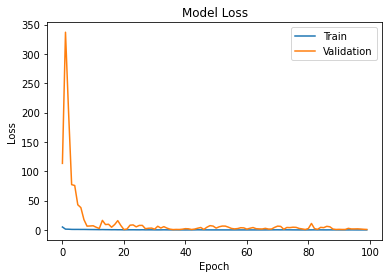

In [36]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('loss_fucntion0.pdf', format='pdf')

In [37]:
# load_model = tf.keras.models.load_model(checkpoint_path)

In [38]:
# import tensorflow as tf
# # Save the entire model in SavedModel format
# model.save('my_model5_1')

In [39]:
# Load the model back
# load_model = tf.keras.models.load_model('my_model5_1')

In [40]:
y_test2 = to_categorical(y_test1)
print(y_test2.shape)

(151, 8)


In [41]:

accuracy = model.evaluate(x_test1, y_test2)

5/5 [==============================] - 0s 31ms/step - loss: 1.0859 - accuracy: 0.8411


In [42]:
predicted = model.predict(x_test1) 
print(predicted)

5/5 [==============================] - 0s 31ms/step
[[1.81307521e-04 2.11016959e-04 2.21191644e-04 ... 3.41715738e-02
  5.98747551e-01 3.66137058e-01]
 [1.29174634e-18 8.52120191e-18 2.47904499e-18 ... 8.48766888e-08
  9.99999881e-01 1.76831989e-08]
 [5.00766502e-04 5.47509873e-04 6.84497645e-04 ... 7.79066235e-02
  8.26544225e-01 9.28589255e-02]
 ...
 [3.72332547e-12 7.56761667e-12 9.08716852e-12 ... 6.22859923e-04
  9.99375045e-01 2.12981695e-06]
 [1.59611102e-10 1.01108615e-10 4.31212260e-10 ... 3.60550730e-05
  1.27721846e-03 9.98686731e-01]
 [4.24688869e-14 1.40482081e-13 1.17662065e-13 ... 1.17299605e-04
  9.90164936e-01 9.71778575e-03]]


In [43]:
classes=np.argmax(predicted,axis=1)
print(classes)

[6 6 6 6 6 5 5 7 5 5 6 5 5 6 5 7 6 6 7 6 5 5 5 7 5 5 5 5 5 5 5 5 6 6 6 6 7
 7 6 6 5 7 7 7 5 6 6 5 6 7 7 6 6 6 6 6 7 5 7 5 7 5 5 6 5 6 5 5 5 7 6 7 5 5
 5 5 5 5 6 5 5 5 6 6 6 5 7 6 7 6 5 6 6 6 7 6 5 6 5 6 7 5 5 5 5 5 7 6 5 6 6
 6 7 6 6 6 7 5 5 6 5 6 5 7 5 5 5 7 6 5 7 6 6 5 6 5 5 6 5 6 5 5 5 7 7 6 6 5
 6 7 6]


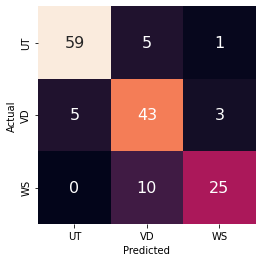

In [44]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

labels = [5, 6, 7] # use the numbers as labels for the confusion matrix
cm = confusion_matrix(y_test1, classes, labels=labels)
df_cm = pd.DataFrame(cm, labels, labels)
ax = sn.heatmap(df_cm, annot=True, annot_kws={'size': 16}, square=True, cbar=False, fmt='g')
ax.set_ylim(0, 3)
plt.xlabel('Predicted') 
plt.ylabel('Actual')
ax.invert_yaxis() #optional

# set the tick labels of the x-axis and y-axis to show the desired labels
plt.xticks([0.5, 1.5, 2.5], ['UT', 'VD', 'WS']) # set the x-axis tick locations and labels
plt.yticks([0.5, 1.5, 2.5], ['UT', 'VD', 'WS']) # set the y-axis tick locations and labels

plt.savefig('heatmap0.pdf', format='pdf')
plt.show()